# CRO Algorithm examples

## Example I: max_ones problem

[*Running] Initialization:  max_ones max


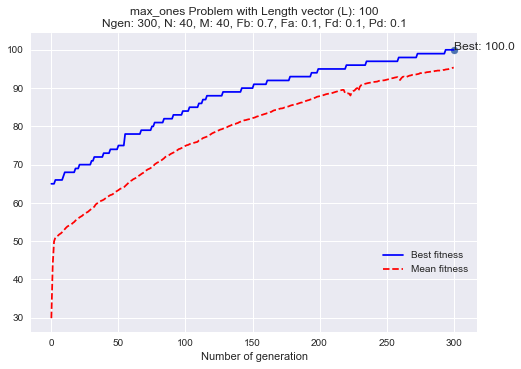

Best coral:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Best solution: 100.0
Wall time: 37.8 s


In [2]:
import numpy as np
import seaborn as sns 
from cro import *
from fitness import max_ones

## ------------------------------------------------------
## Parameters initialization

Ngen = 300                 # Number of generations
N  = 40                    # MxN: reef size
M  = 40                    # MxN: reef size
Fb = 0.7                   # Broadcast prob.
Fa = 0.1                   # Asexual reproduction prob.
Fd = 0.1                   # Fraction of the corals to be eliminated in the depredation operator.
r0 = 0.6                   # Free/total initial proportion
k  = 3                     # Number of opportunities for a new coral to settle in the reef
Pd = 0.1                   # Depredation prob.
opt= 'max'                 # flag: 'max' for maximizing and 'min' for minimizing
L = 100
ke = 0.2
## ------------------------------------------------------

cro = CRO(Ngen, N, M, Fb, Fa, Fd, r0, k, Pd, max_ones, opt, L, problem_name='max_ones', verbose=False, ke=ke)
%time (REEF, REEFpob, REEFfitness, ind_best, Bestfitness, Meanfitness) = cro.fit()

## Example II: feature selection Classification (max auc)

https://www.kaggle.com/primaryobjects/voicegender

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. It contains 20 features and I added 10 noisy!

[*Running] Initialization:  feature_selection max
Reef initialization: 0.741836734694
Best-fitness: 0.741836734694 
 0.0% completado 

Best-fitness: 0.875945838311 
 25.0% completado 

Best-fitness: 0.982046070461 
 50.0% completado 

Best-fitness: 0.962659235669 
 75.0% completado 

Best-fitness: 0.995137892555 
 100% completado 



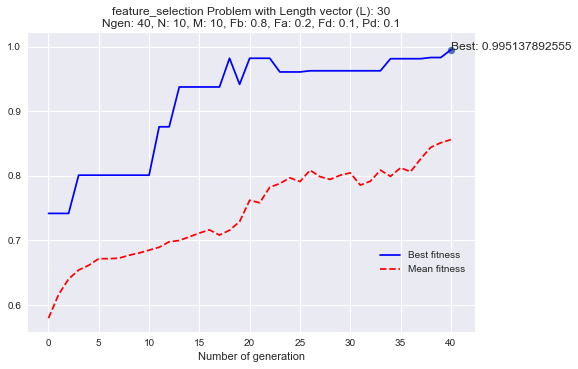

Best coral:  [1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
Best solution: 0.995137892555
Wall time: 1min 14s
['meanfreq' 'sd' 'median' 'Q25' 'Q75' 'IQR' 'sp.ent' 'mode' 'centroid'
 'meanfun' 'minfun' 'maxfun' 'mindom' 'modindx']


In [2]:
from functools import partial
import numpy as np
import seaborn as sns 
from cro import *
from utils import load_data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from fitness import feature_selection

## ------------------------------------------------------
## Parameters initialization
## ------------------------------------------------------
Ngen = 40                  # Number of generations
N  = 10                    # MxN: reef size
M  = 10                    # MxN: reef size
Fb = 0.8                   # Broadcast prob.
Fa = 0.2                   # Asexual reproduction prob.
Fd = 0.1                   # Fraction of the corals to be eliminated in the depredation operator.
r0 = 0.6                   # Free/total initial proportion
k  = 3                     # Number of opportunities for a new coral to settle in the reef
Pd = 0.1                   # Depredation prob.
opt= 'max'                 # flag: 'max' for maximizing and 'min' for minimizing
problem ='feature_selection'
## ------------------------------------------------------

dataset = load_data('voice')
L = dataset.data.shape[1] # number of features
X = dataset.data
y = dataset.target

clf = KNeighborsClassifier(2)

fitness_coral = partial(feature_selection, X=X, y=y, model=clf,
                        get_prediction = lambda clf, X: clf.predict_proba(X)[:, 1], 
                        metric=roc_auc_score)

cro = CRO(Ngen, N, M, Fb, Fa, Fd, r0, k, Pd, fitness_coral, opt, L, seed=13, problem_name=problem, verbose=True)
%time (REEF, REEFpob, REEFfitness, ind_best, Bestfitness, Meanfitness) = cro.fit(X, y, clf)

names = np.array(dataset.feature_names)
print(names[REEFpob[ind_best, :]>0])

## Example III: feature selection, regression (min mse)

[*Running] Initialization:  feature_selection min
Reef initialization: 4.87331488701
Best-fitness: 4.43093135124 
 0.0% completado 

Best-fitness: 4.34208877529 
 16.666666666666664% completado 

Best-fitness: 4.26769507236 
 33.33333333333333% completado 

Best-fitness: 4.26769507236 
 50.0% completado 

Best-fitness: 4.26769507236 
 66.66666666666666% completado 

Best-fitness: 4.26769507236 
 83.33333333333334% completado 

Best-fitness: 4.26769507236 
 100% completado 



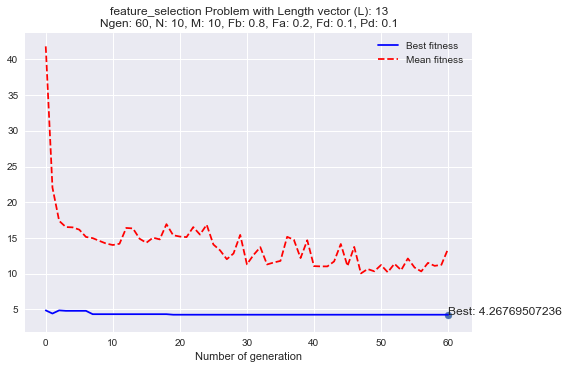

Best coral:  [1 1 1 0 1 1 1 1 1 1 1 1 1]
Best solution: 4.26769507236
Wall time: 4min 29s
['CRIM' 'ZN' 'INDUS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B'
 'LSTAT']


In [4]:
import numpy as np
import seaborn as sns 
from sklearn import datasets, ensemble
from sklearn.metrics import r2_score, mean_squared_error   
from cro import *
from fitness import feature_selection

## ------------------------------------------------------
## Parameters initialization
## ------------------------------------------------------
Ngen = 60                  # Number of generations
N  = 10                    # MxN: reef size
M  = 10                     # MxN: reef size
Fb = 0.8                   # Broadcast prob.
Fa = 0.2                   # Asexual reproduction prob.
Fd = 0.1                   # Fraction of the corals to be eliminated in the depredation operator.
r0 = 0.7                   # Free/total initial proportion
k  = 3                     # Number of opportunities for a new coral to settle in the reef
Pd = 0.1                   # Depredation prob.
opt= 'min'                 # flag: 'max' for maximizing and 'min' for minimizing

problem ='feature_selection'
## ------------------------------------------------------

dataset = datasets.load_boston()
L = dataset.data.shape[1] # number of features
X = dataset.data
y = dataset.target

params = {'n_estimators': 60, 'max_depth': 4, 'min_samples_split': 2}
gbr = ensemble.GradientBoostingRegressor(**params)  

fitness_coral = partial(feature_selection, X=X, y=y, model=gbr,
                        get_prediction=lambda gbr, X: gbr.predict(X), 
                        metric=mean_squared_error)

cro = CRO(Ngen, N, M, Fb, Fa, Fd, r0, k, Pd, fitness_coral, opt, L, problem_name=problem, verbose=True)
%time (REEF, REEFpob, REEFfitness, ind_best, Bestfitness, Meanfitness) = cro.fit(X, y, gbr)

names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
print(names[REEFpob[ind_best, :]>0])